In [5]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Importing Dataset
df=pd.read_csv("/content/drive/MyDrive/covid19_dataset.xls")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [10]:
df=df.drop("Province/State",axis=1)

In [11]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
#Total no of active cases
df['active']=df["Confirmed"]-df["Deaths"]-df["Recovered"]
df['active']

,active
0,0
1,0
2,0
3,0
4,0
...,...
49063,117
49064,375
49065,19
49066,1147


In [15]:
#At the end of the dataset, when the last record was taken, so what was the current / latest values for the records
top=df[df["Date"]==df["Date"].max()]
top

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,active
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [16]:
#Data based on the country
w=df.groupby("Country/Region")[["Confirmed","active","Deaths"]].sum().reset_index()
w

,Country/Region,Confirmed,active,Deaths
0,Afghanistan,1936390,1089052,49098
1,Albania,196702,72117,5708
2,Algeria,1179755,345886,77972
3,Andorra,94404,19907,5423
4,Angola,22662,15011,1078
...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370
183,Western Sahara,901,190,63
184,Yemen,67180,25694,17707
185,Zambia,129421,43167,2643


In [17]:
#Cases in India
w[w["Country/Region"]=="India"]

,Country/Region,Confirmed,active,Deaths
79,India,40883464,15987913,1111831


In [18]:
#confirmed cases

fig = px.choropleth(
    w, # Data
    locations = "Country/Region", # Column from which the reference has been taken
    locationmode = "country names", # Show the country names
    color = "Confirmed", # Which column we consider while plotting
    hover_name = "Country/Region", #
    range_color = [1, 100000000],
    color_continuous_scale = "portland"
)
fig.show()

In [19]:
#Active Cases

fig = px.choropleth(
    w, # Data
    locations = "Country/Region", # Column from which the reference has been taken
    locationmode = "country names", # Show the country names
    color = "active", # Which column we consider while plotting
    hover_name = "Country/Region", #
    range_color = [1, 100000000],
    color_continuous_scale = "portland"
)

fig.show()

In [20]:
#Death cases

fig=px.choropleth(w,
                  locations="Country/Region",
                  locationmode="country names",
                  color="Deaths",
                  hover_name="Country/Region",
                  range_color=[1, 100000000],
                  color_continuous_scale="portland")
fig.show()

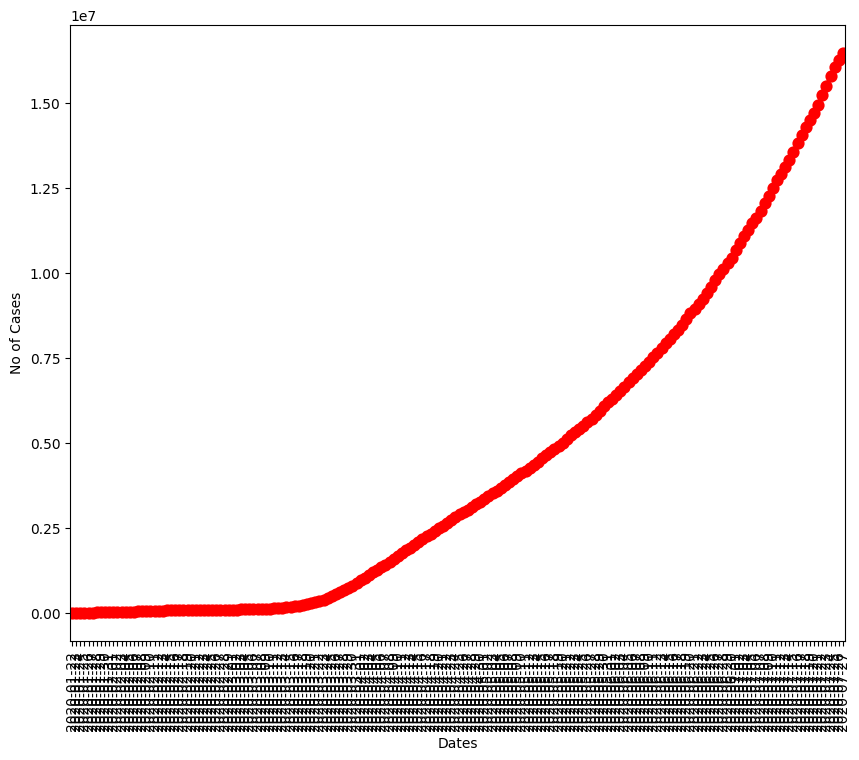

In [21]:
import seaborn as sns
#Visualise all the confirmed cases
plt.figure(figsize=(10, 8))

## Find the confirmed cases firstly
confirm_cases=df.groupby("Date")["Confirmed"].sum().reset_index()

#We will convert this date column date-time
confirm_cases["Date"]=pd.to_datetime(confirm_cases["Date"])

# Create the plot here
a=sns.pointplot(x=confirm_cases.Date.dt.date,y=confirm_cases.Confirmed,color="r")

#labels
a.set(xlabel="Dates",ylabel="No of Cases")

plt.xticks(rotation = 90)
plt.show()

<Figure size 2000x1500 with 0 Axes>

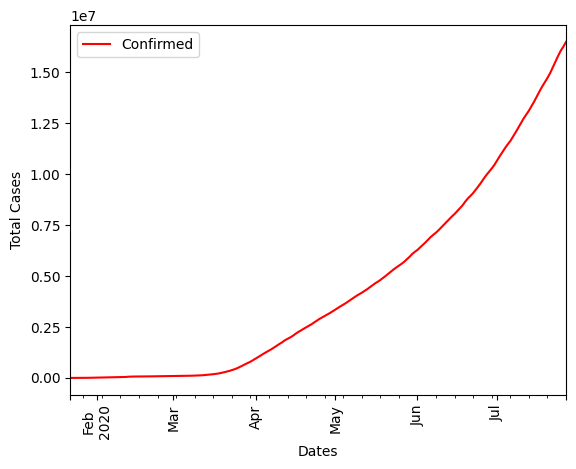

In [22]:
plt.figure(figsize = (20, 15))

# Find the confirmed cases firtly
confirm_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

# We will convert this date column date-time
confirm_cases["Date"] = pd.to_datetime(confirm_cases["Date"])

#plot
confirm_cases=confirm_cases.set_index("Date")
a=confirm_cases.plot(kind="line",color="r")
a.set(xlabel = "Dates", ylabel = "Total Cases")


plt.xticks(rotation = 90)
plt.show()


In [23]:
confirm_cases.head()

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


In [24]:
#Forecasting using Prophet

In [25]:
!pip install prophet

In [26]:
from prophet import Prophet

In [27]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,active
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,0


In [28]:
#Collected based on date
df.groupby("Date").sum().head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,active
Date,,,,,,,,,
2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,555,17,28,510,Eastern MediterraneanEuropeAfricaEuropeAfricaA...,510
2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,654,18,30,606,Eastern MediterraneanEuropeAfricaEuropeAfricaA...,606
2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,941,26,36,879,Eastern MediterraneanEuropeAfricaEuropeAfricaA...,879
2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,1434,42,39,1353,Eastern MediterraneanEuropeAfricaEuropeAfricaA...,1353
2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,2118,56,52,2010,Eastern MediterraneanEuropeAfricaEuropeAfricaA...,2010


In [29]:
total_active_cases=df["Active"].sum()
total_active_cases

396715350

In [30]:
#Creating the data for confirmed, recoverd and deaths

confirmed=df.groupby("Date")["Confirmed"].sum().reset_index()
deaths=df.groupby("Date")["Deaths"].sum().reset_index()
recovered=df.groupby("Date")["Recovered"].sum().reset_index()



In [31]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [32]:
deaths.head()


,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [33]:
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [34]:
confirmed.to_csv("confirmed.csv")

Forecast for confirmed cases using Prophet

In [35]:
confirmed.columns=["ds","y"] # making the date (ds) and target (y)

In [36]:
confirmed["ds"]=pd.to_datetime(confirmed["ds"])


In [37]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [38]:
model=Prophet()

In [39]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjav_0ea2/wajdgd63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjav_0ea2/t9j3tpqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81259', 'data', 'file=/tmp/tmpjav_0ea2/wajdgd63.json', 'init=/tmp/tmpjav_0ea2/t9j3tpqx.json', 'output', 'file=/tmp/tmpjav_0ea2/prophet_modelsm21fh2_/prophet_model-20241113181636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
future=model.make_future_dataframe(periods=30)

In [41]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25


In [42]:
forecast=model.predict(future)

In [43]:
forecast[["ds","yhat"]]

,ds,yhat
0,2020-01-22,-2.067684e+04
1,2020-01-23,-8.050948e+03
2,2020-01-24,5.827455e+03
3,2020-01-25,1.217668e+04
4,2020-01-26,8.405020e+03
...,...,...
213,2020-08-22,2.145056e+07
214,2020-08-23,2.164810e+07
215,2020-08-24,2.184268e+07
216,2020-08-25,2.203193e+07


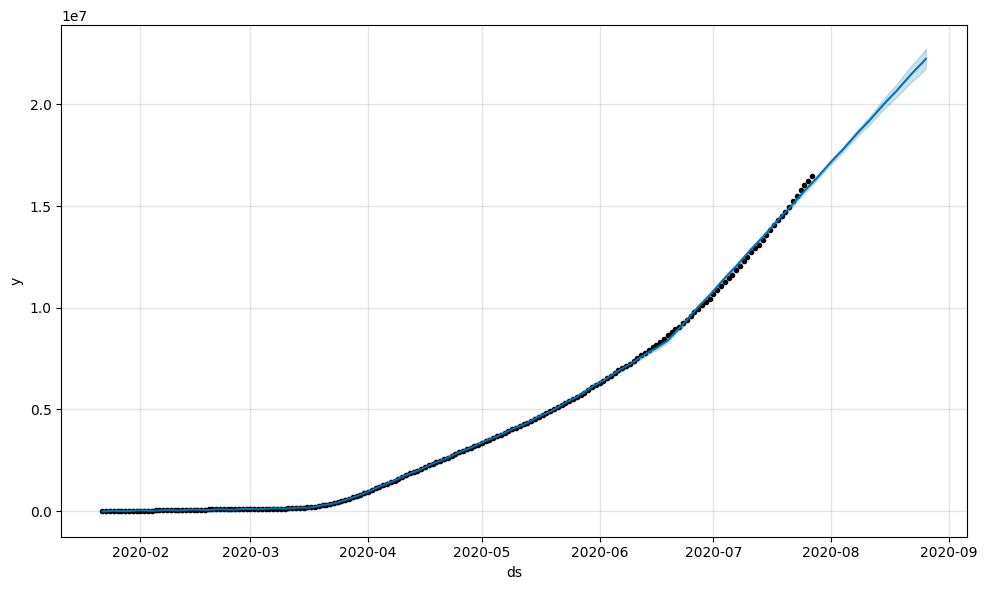

In [44]:
confirmed_plot = model.plot(forecast)

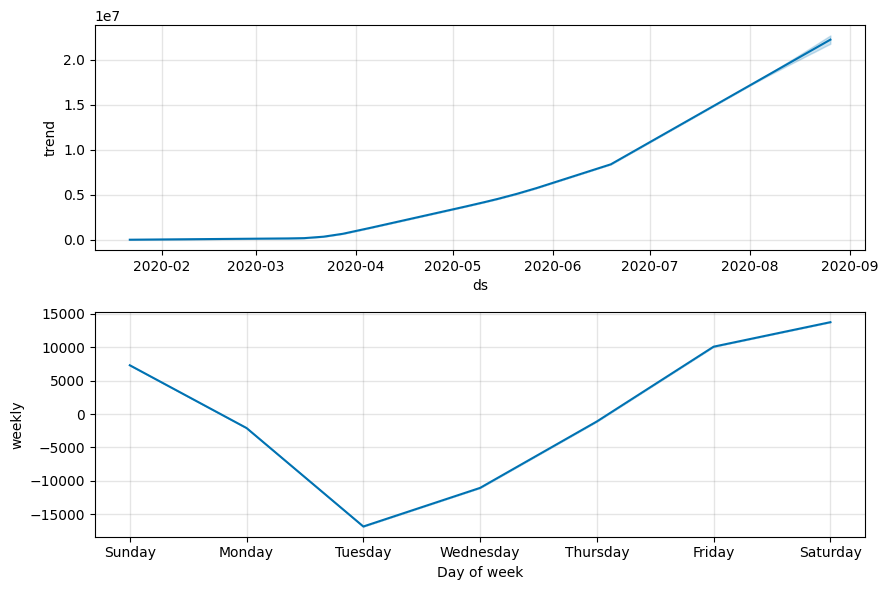

In [45]:
confirmed_plot_components=model.plot_components(forecast)